In [3]:
import rdflib

g = rdflib.Graph()
g.parse("graph.ttl",format="ttl") #load local rdf file

<Graph identifier=Ne5896df9af8d4f3da3799f586d020cbd (<class 'rdflib.graph.Graph'>)>

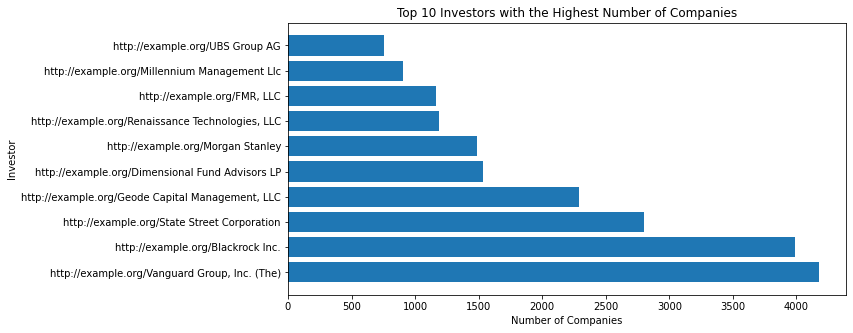

In [7]:
import matplotlib.pyplot as plt

g = rdflib.Graph()
g.parse("graph.ttl", format="ttl")

# SPARQL query to get the top 10 investors with the highest number of companies
query = """
PREFIX ns: <http://example.org/>
SELECT ?investor (COUNT(DISTINCT ?company) AS ?numCompanies)
WHERE {
  ?investment ns:investor ?investor ;
              ns:shareholderOf ?company .
}
GROUP BY ?investor
ORDER BY DESC(?numCompanies)
LIMIT 10
"""

results = g.query(query)

investors = []
num_companies = []

# Extract the results and store them in two lists: investors and num_companies
for row in results:
    investors.append(str(row[0]))
    num_companies.append(int(row[1]))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.barh(investors, num_companies)
plt.xlabel("Number of Companies")
plt.ylabel("Investor")
plt.title("Top 10 Investors with the Highest Number of Companies")
plt.show()
